In [91]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [92]:
df = pd.read_csv("homeprices_banglore.csv")
if df.empty:
  print("This data set is empty please check again")
else:
  print(df.sample(5))
# df.drop('price',axis='columns')
df['price'].values
print()
df['price'].values.reshape(df.shape[0],1)

    area  bedrooms  price
12  1000         2   38.0
9   3700         5  167.0
14  2250         3  101.0
11  2785         4  140.0
17  1540         3   60.0



array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

In [153]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = preprocessing.MinMaxScaler().fit_transform(df.drop('price',axis='columns'))
scaled_y = preprocessing.MinMaxScaler().fit_transform(df['price'].values.reshape(df.shape[0],1))
df.drop('price',axis='columns').shape
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [94]:
def batch_gradient(x,y_true,epochs):
  learning_rate = 0.01
  w = np.ones(shape=(x.shape[1]))
  b = 0
  total_sample = x.shape[0]

  cost_list = []
  epochs_list = []
  for i in range(epochs):
    y_predicted = np.dot(w,np.transpose(scaled_x)) + b

    w_grad = -(2/total_sample)*(x.T.dot(y_true-y_predicted))
    b_grad = -(2/total_sample)*np.sum(y_true-y_predicted)

    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

    cost = np.mean(np.square(y_true-y_predicted))

    if i%10==0:
      cost_list.append(cost)
      epochs_list.append(i)

  return w , b ,cost , cost_list , epochs_list


In [95]:
w,b,cost,cost_list,epochs_list = batch_gradient(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w , b , cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

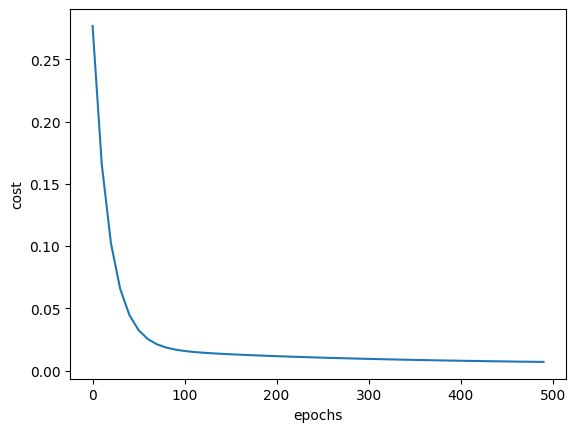

In [147]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epochs_list,cost_list)

In [163]:
preprocessing.MinMaxScaler().fit_transform([[1800,3]])

array([[0., 0.]])

In [158]:
def predict(area,bedrooms,w,b):
  scaled_X = preprocessing.MinMaxScaler().fit.transform([[area,bedrooms]])[0]
  print(scaled_X)
  scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[0] + b
  print()
  print(scaled_price)
  scaled_price = preprocessing.MinMaxScaler().fit_transform([[scaled_price]])
  return preprocessing.MinMaxScaler().inverse_transform(scaled_price)[0][0]

#here some error please check while revisit

In [165]:
predict(1800,3,w,b)
#there is some error in fitting the data check later when you revisit this

AttributeError: 'function' object has no attribute 'transform'

In [166]:
import random

In [178]:
def stochastic_gradient(x,y_true,epochs):
  learning_rate = 0.01
  w = np.ones(shape=(x.shape[1]))
  b = 0
  total_sample = x.shape[0]

  cost_list = []
  epochs_list = []
  for i in range(epochs):
    random_index = random.randint(0,total_sample-1)
    sample_X = x[random_index]
    sample_y = y_true[random_index]
    y_predicted = np.dot(w,np.transpose(sample_X)) + b

    w_grad = -(2/total_sample)*(sample_X.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_sample)*np.sum(sample_y-y_predicted)

    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

    cost = np.mean(np.square(sample_y-y_predicted))

    if i%10==0:
      cost_list.append(cost)
      epochs_list.append(i)

  return w , b ,cost , cost_list , epochs_list


In [179]:
w,b,cost,cost_list,epochs_list = stochastic_gradient(scaled_x,scaled_y.reshape(scaled_y.shape[0],),1000)
w , b , cost

(array([0.87297369, 0.84156435]), -0.2535977190811783, 0.058612573702376165)

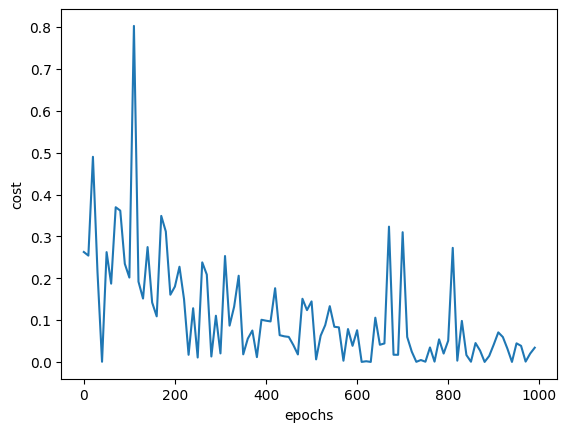

In [180]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epochs_list,cost_list)